In [127]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
from pathlib import Path
%matplotlib inline

#Data Cleaning
In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.Files:
*whale_returns.csv
*algo_returns.csv
*sp500_history.csv

#Whale Returns
Read the Whale Portfolio daily returns and clean the data

In [128]:
 # Reading whale returns
whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True,
                           parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [129]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [130]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data

In [131]:
# Reading algorithmic returns
algo_returns = pd.read_csv("algo_returns.csv" , index_col="Date", infer_datetime_format=True,
                           parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [132]:
 # Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [133]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

S&P 500 Returns
Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data.

In [134]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("sp500_history.csv" , index_col="Date", infer_datetime_format=True,
                           parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [135]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [136]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$","")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [137]:
# Calculate Daily Returns
sp500_history = sp500_history.pct_change()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [138]:
# Drop nulls
sp500_history = sp500_history.dropna().copy()
sp500_history.isnull().sum()

Close    0
dtype: int64

In [139]:
# Rename Column
sp500_history = sp500_history.rename(columns={"Close": "S&P 500"})
sp500_history.tail()

,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [140]:
# Concatenate all DataFrames into a single DataFrame
all_dataframes = pd.concat([whale_returns,algo_returns,sp500_history], axis="columns",join="inner")
all_dataframes.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


 Portfolio Analysis
In this section, you will calculate and visualize performance and risk metrics for the portfolios. Performance
Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500?

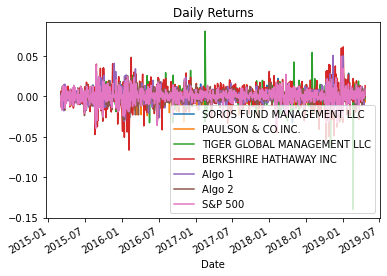

In [141]:
# Plot daily returns
all_dataframes.plot(title="Daily Returns")

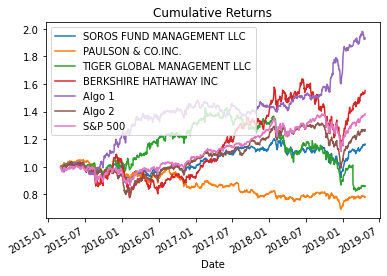

In [142]:
# Plot cumulative returns
cumulative_returns = (1 + all_dataframes).cumprod()
cumulative_returns.plot(title="Cumulative Returns")

#Risk
Determine the risk of each portfolio:
Create a box plot for each portfolio. 
Calculate the standard deviation for all portfolios
Determine which portfolios are riskier than the S&P 500
Calculate the Annualized Standard Deviation

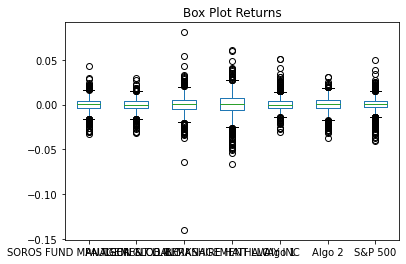

In [143]:
# Box plot to visually show risk
all_dataframes.plot.box(title="Box Plot Returns")

In [144]:
 # Daily Standard Deviations
all_dataframes.std().sort_values()
# Calculate the standard deviation for each portfolio.
sp500risk = all_dataframes["S&P 500"].std()
# Which portfolios are riskier than the S&P 500?
all_dataframes.std() > sp500risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [145]:
 # Calculate the annualized standard deviation (252 trading days)
annual_std = all_dataframes.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

 Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta. 
Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

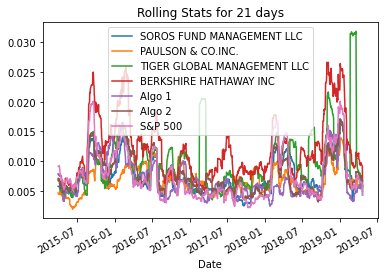

In [146]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
all_dataframes_roll_std = all_dataframes.rolling(window=21).std()
all_dataframes_roll_std.plot(title="Rolling Stats for 21 days")


In [147]:
# Construct a correlation table
corr_df = all_dataframes.corr()
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


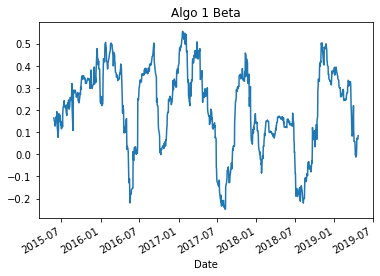

In [148]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = all_dataframes["Algo 1"].rolling(window=60).cov(all_dataframes["S&P 500"])
variance = all_dataframes["S&P 500"].rolling(window=60).var()
beta = covariance/variance
beta.plot(title="Algo 1 Beta")

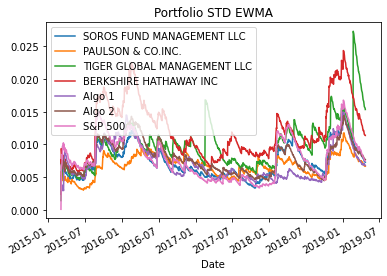

In [149]:
# Calculate a rolling window using the exponentially weighted moving average. 
all_dataframes.ewm(halflife=21).std().plot(title="Portfolio STD EWMA")

 Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)
Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [150]:
# Calculate annualized Sharpe Ratios
shape_ratios = (all_dataframes.mean() * 252) / (all_dataframes.std() * np.sqrt(252))
shape_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

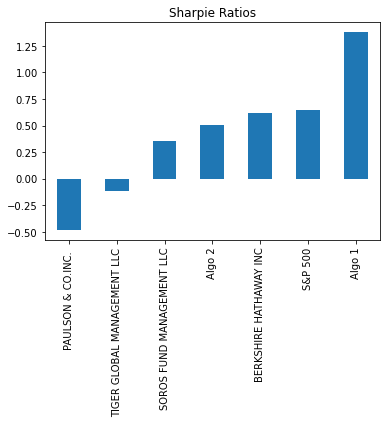

In [151]:
# Visualize the sharpe ratios as a bar plot
shape_ratios.sort_values().plot(kind="bar", title="Sharpie Ratios")

 Portfolio Returns
In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 
Visit Google Sheets and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
Download the data as CSV files and calculate the portfolio returns.
Calculate the returns for each stock.
Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?

Your analysis should include the following:

Using all portfolios:
The annualized standard deviation (252 trading days) for all portfolios.
The plotted rolling standard deviation using a 21 trading day window for all portfolios.
The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
A correlation table.


Using your custom portfolio and one other of your choosing:
The plotted beta. 



 Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [182]:
# Read the first stock
startdate = "2019-11-06"
PYPL = pdr.DataReader("PYPL","yahoo",startdate)
PYPL.dtypes
PYPL.index.dtype

dtype('<M8[ns]')

In [153]:
# Read the second stock
startdate = "2019-11-06"
GS = pdr.DataReader("GS","yahoo",startdate)
GS.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [154]:
# Read the third stock
startdate = "2019-11-06"
SQ = pdr.DataReader("SQ","yahoo",startdate)
SQ.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [155]:
# Concatenate all stocks into a single DataFrame
portfolio = pd.concat([PYPL["Adj Close"], GS["Adj Close"], SQ["Adj Close"]], axis="columns", join="inner")
portfolio.head()                                         

,Adj Close,Adj Close,Adj Close
Date,,,
2019-11-06,100.629997,213.243362,61.340000
2019-11-07,100.470001,217.997940,64.410004
2019-11-08,101.419998,217.626953,62.450001
2019-11-11,102.669998,213.838898,63.790001
2019-11-12,102.029999,215.186218,61.540001


In [156]:
# Reset the index
# Pivot so that each column of prices represents a unique symbol

portfolio.columns = ["PYPL", "GS", "SQ"]
portfolio.tail()

,PYPL,GS,SQ
Date,,,
2020-11-09,184.720001,214.929993,184.080002
2020-11-10,183.360001,217.470001,172.000000
2020-11-11,192.339996,218.050003,183.419998
2020-11-12,189.100006,214.509995,178.509995
2020-11-13,188.619995,219.080002,177.190002


In [157]:
#daily returns
daily_returns = portfolio.pct_change()

#drop nas
daily_returns = daily_returns.dropna().copy()

daily_returns.head()

,PYPL,GS,SQ
Date,,,
2019-11-07,-0.001590,0.022296,0.050049
2019-11-08,0.009456,-0.001702,-0.030430
2019-11-11,0.012325,-0.017406,0.021457
2019-11-12,-0.006234,0.006301,-0.035272
2019-11-13,0.000882,-0.004945,-0.000488


In [158]:
#automatic equal weighting
len(portfolio.columns)

3

In [159]:
#Numpy to create a list/array
np.full((1,len(portfolio.columns)), 1/len(portfolio.columns))[0]

array([0.33333333, 0.33333333, 0.33333333])

 Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [160]:
# Calculate weighted portfolio returns
weights = np.full((1,len(portfolio.columns)), 1/len(portfolio.columns))[0]

#portfolio returns
portfolio_returns = daily_returns.dot(weights)

portfolio_returns.head()


Date
2019-11-07    0.023585
2019-11-08   -0.007559
2019-11-11    0.005459
2019-11-12   -0.011735
2019-11-13   -0.001517
dtype: float64

Join your portfolio returns to the DataFrame that contains all of the portfolio returns


In [161]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_dataframes["Custom"] = portfolio_returns
all_dataframes.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [162]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [164]:
# Risk
risk = all_dataframes.std() * np.sqrt(252)
risk.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Custom                              NaN
dtype: float64

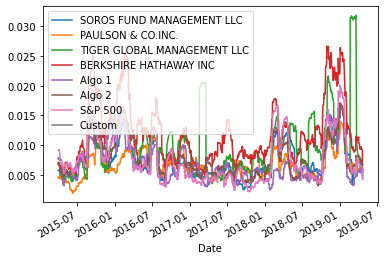

In [167]:
# Rolling
rolling_std_dev = all_dataframes.rolling(window=21).std()

#plot
rolling_std_dev.plot()

In [179]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_dataframes.mean() * 252) / (all_dataframes.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
Custom                              NaN
dtype: float64

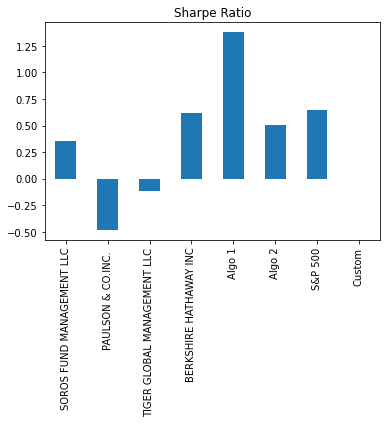

In [180]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

In [169]:
# Create a correlation analysis
df = all_dataframes.corr()
df.style.background_gradient(cmap='bwr')

/Users/owner/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,nan
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,nan
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,nan
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,nan
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,nan
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,nan
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,nan
Custom,nan,nan,nan,nan,nan,nan,nan,nan


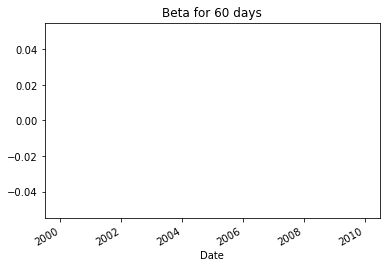

In [173]:
# Beta
covariance = all_dataframes["Custom"].rolling(window=60).cov(all_dataframes['S&P 500'])
variance = all_dataframes['S&P 500'].rolling(window=60).var()
beta = covariance/variance
beta.plot(title='Beta for 60 days')